<a href="https://www.kaggle.com/code/eissaislam/sign-language-classification-using-cnn?scriptVersionId=128576391" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = r'/kaggle/input/asl-dataset/asl_dataset/asl_dataset/'
labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [3]:
# load the images and labels
labels = os.listdir(train_dir)
X_train = []
y_train = []
X_valid = []
y_valid = []

for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    for file in os.listdir(folderpath)[0:60]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[60:70]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2160, 224, 224, 3)
(2160,)
(355, 224, 224, 3)
(355,)


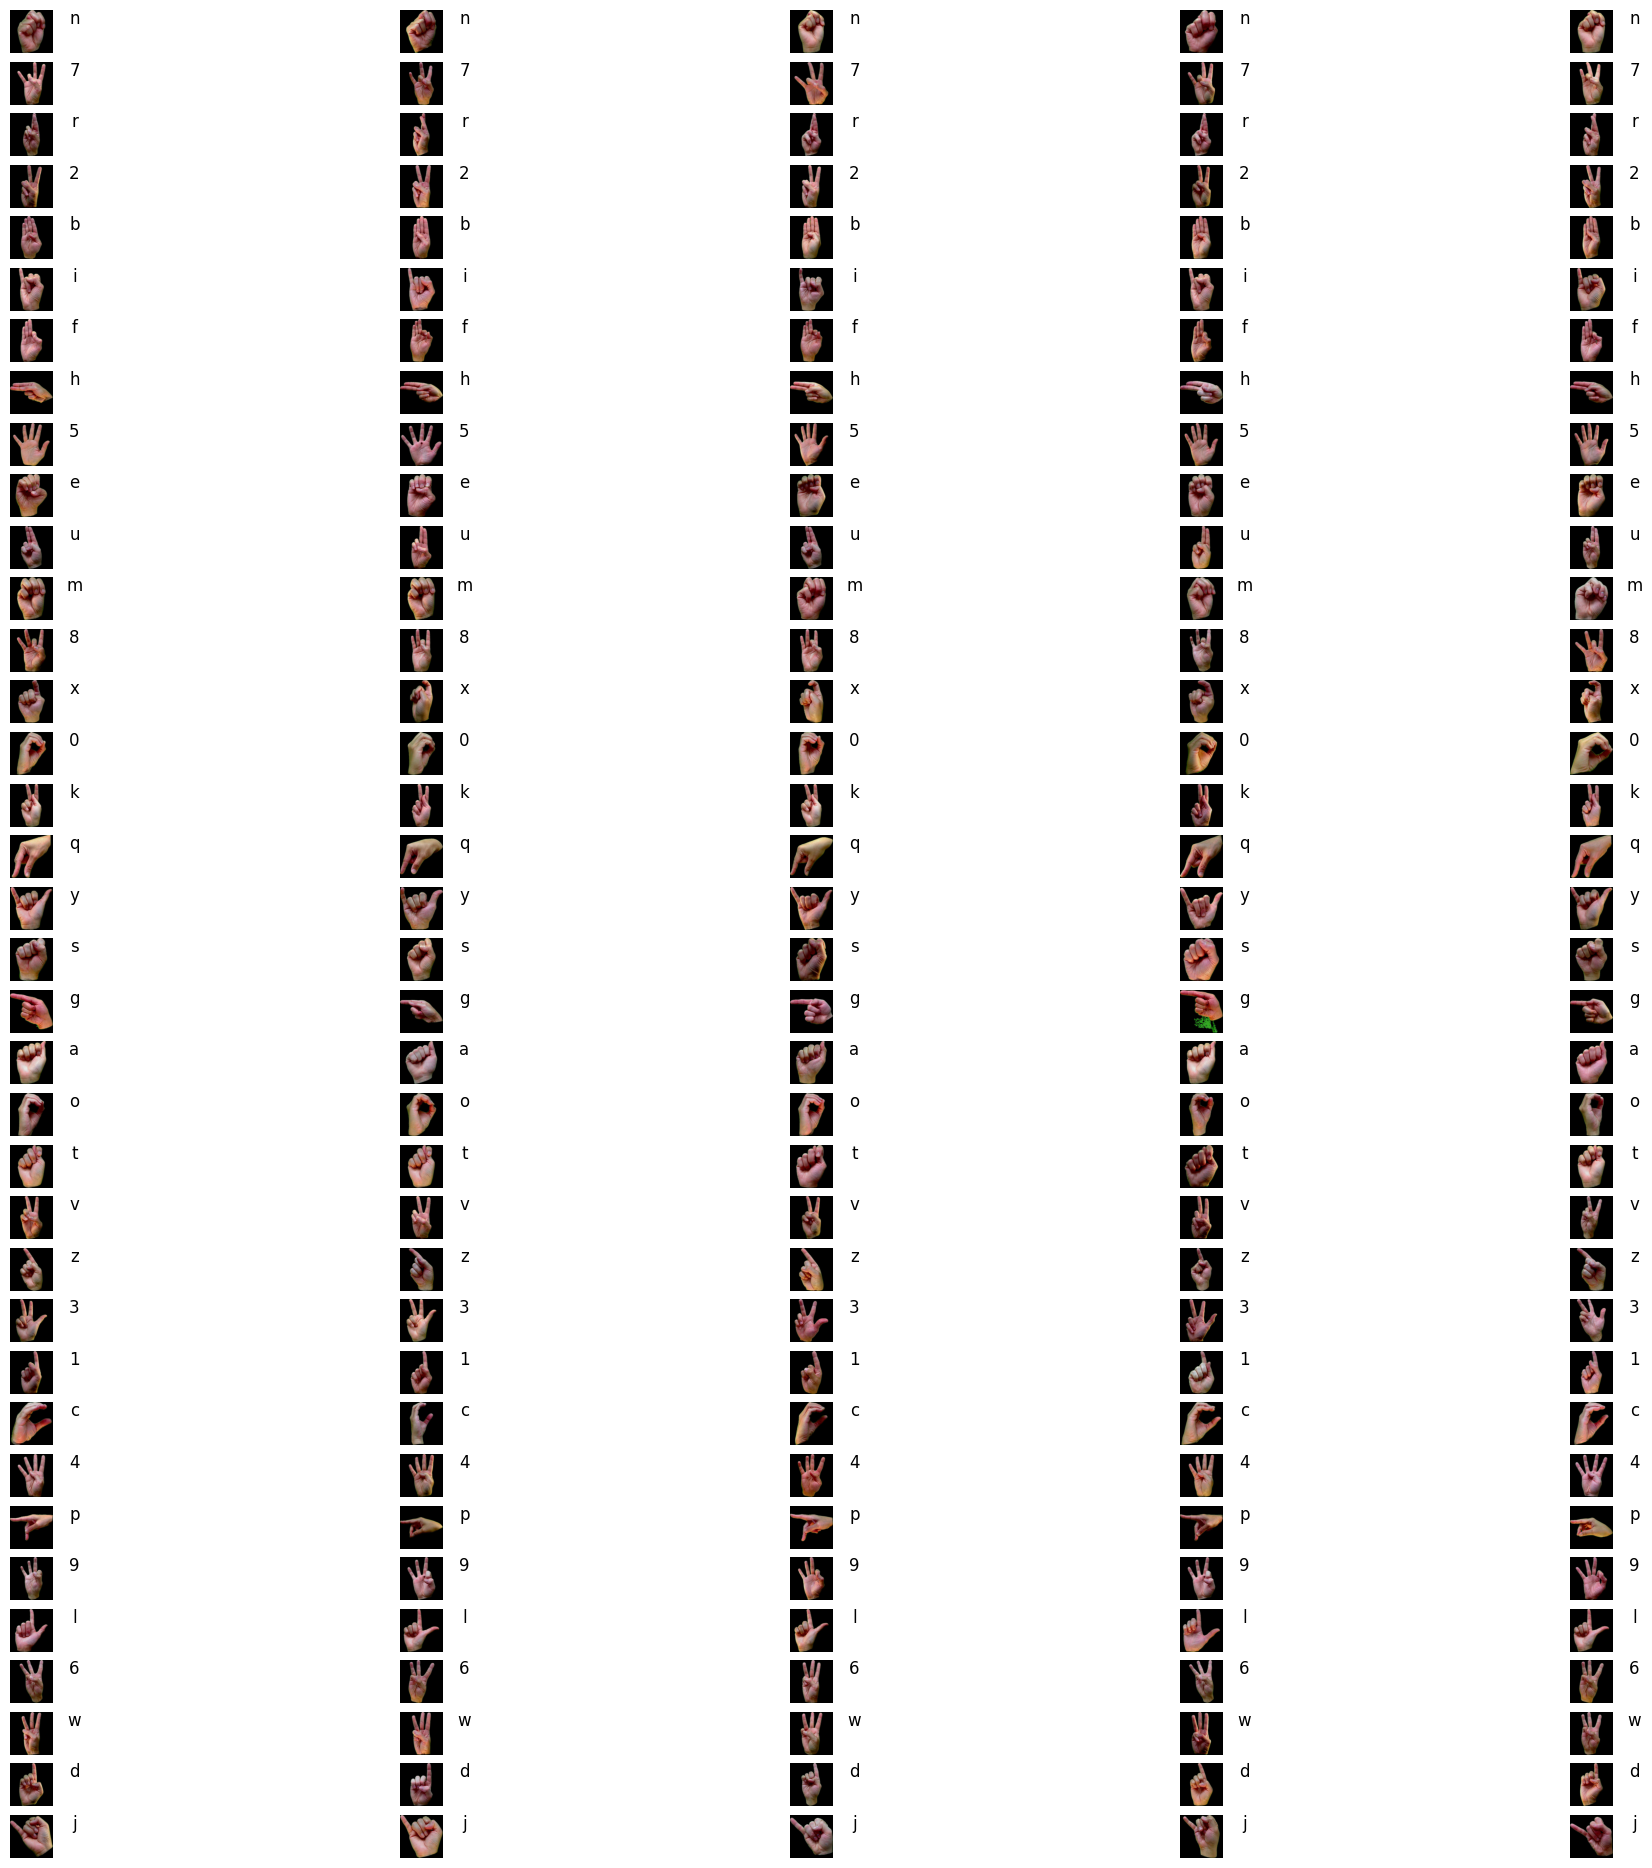

In [4]:
# display 5 random images with their labels
fig, axes = plt.subplots(nrows=len(labels), ncols=5, figsize=(24, 24))
fig.subplots_adjust(wspace=0.3)  # adjust spacing between image and text
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    img_names = os.listdir(folderpath)[:5]
    for j, img_name in enumerate(img_names):
        img_path = folderpath + img_name
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(label[:-1], fontsize=14)
        axes[i, j].text(1.5, 0.8, label[-1], fontsize=12, ha='center', va='center', transform=axes[i, j].transAxes)
plt.show()

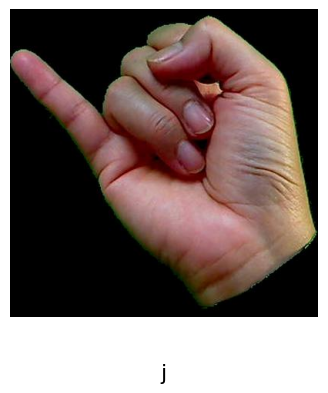

In [5]:
# choose a random label and a random image from the label folder
label = random.choice(labels)  # choose a random label
folderpath = train_dir + label + '/'
img_names = os.listdir(folderpath)[:3]
img_name = random.choice(img_names)  # choose a random image in the folder

# display the image with its label
fig, ax = plt.subplots(figsize=(4, 4))
img_path = folderpath + img_name
img = plt.imread(img_path)
ax.imshow(img)
ax.axis('off')
ax.text(0.5, -0.2, label, fontsize=16, ha='center', transform=ax.transAxes)

plt.show()

In [6]:
# define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])


In [7]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)

In [9]:
# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
stop_loss = 0.17499  # set the stopping loss value

In [10]:
# train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=15,
                    callbacks=[checkpoint, early_stop])

# find the epoch where the stopping loss was reached
loss = history.history['val_loss']
epoch = np.argmax(np.array(loss) <= stop_loss) + 1

Epoch 1/15
68/68 [==============================] - ETA: 0s - loss: 9.2778 - accuracy: 0.3981
Epoch 1: val_accuracy improved from -inf to 0.83662, saving model to best_model.h5
68/68 [==============================] - 15s 62ms/step - loss: 9.2778 - accuracy: 0.3981 - val_loss: 0.5789 - val_accuracy: 0.8366
Epoch 2/15
67/68 [============================>.] - ETA: 0s - loss: 0.7289 - accuracy: 0.7878
Epoch 2: val_accuracy improved from 0.83662 to 0.92958, saving model to best_model.h5
68/68 [==============================] - 4s 52ms/step - loss: 0.7262 - accuracy: 0.7884 - val_loss: 0.2740 - val_accuracy: 0.9296
Epoch 3/15
67/68 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.8647
Epoch 3: val_accuracy improved from 0.92958 to 0.93521, saving model to best_model.h5
68/68 [==============================] - 3s 51ms/step - loss: 0.4265 - accuracy: 0.8653 - val_loss: 0.1879 - val_accuracy: 0.9352
Epoch 4/15
67/68 [============================>.] - ETA: 0s - loss: 0.30

In [11]:
# load the best model
model = load_model('best_model.h5')

In [12]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose=2)
print('Test accuracy:', test_acc)

12/12 - 0s - loss: 0.1529 - accuracy: 0.9606 - 311ms/epoch - 26ms/step
Test accuracy: 0.9605633616447449


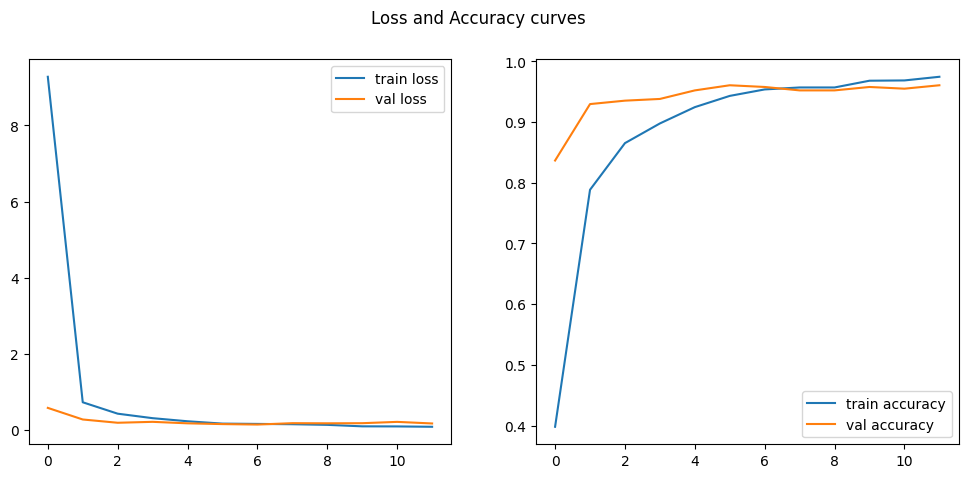

In [13]:
def plot_learning_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Loss and Accuracy curves')
    ax1.plot(loss, label='train loss')
    ax1.plot(val_loss, label='val loss')
    ax1.legend(loc="upper right")
    ax2.plot(accuracy, label='train accuracy')
    ax2.plot(val_accuracy, label='val accuracy')
    ax2.legend()
    plt.show()
    
plot_learning_curves(history)

In [14]:
def conf_matrix(model, X_valid, y_valid, labels):
    predictions = model.predict(X_valid)
    y_pred = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Greens", fmt=".0f", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
    plt.savefig("ConfMat.png")
    plt.show()

12/12 [==============================] - 0s 13ms/step


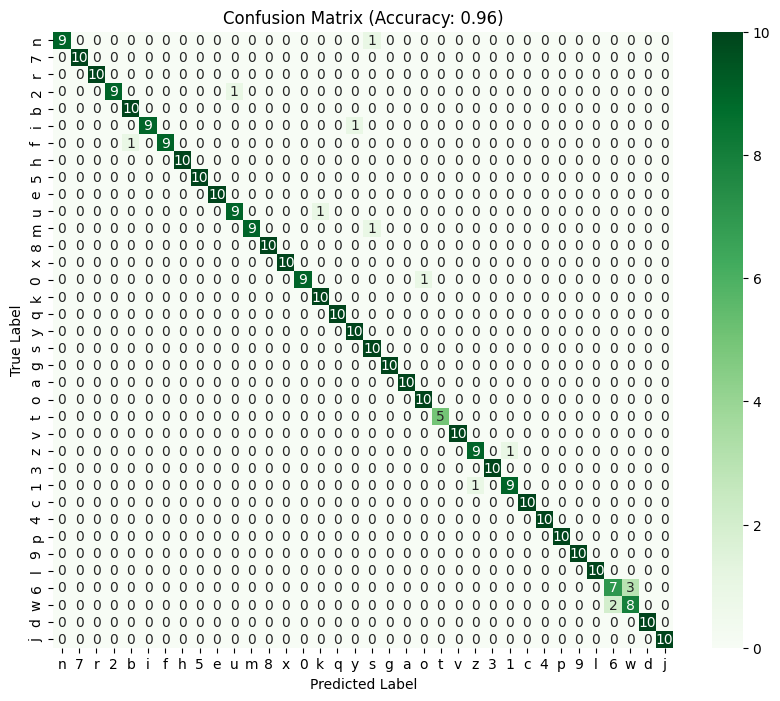

In [15]:
conf_matrix(model, X_valid, y_valid, labels)

12/12 [==============================] - 0s 15ms/step


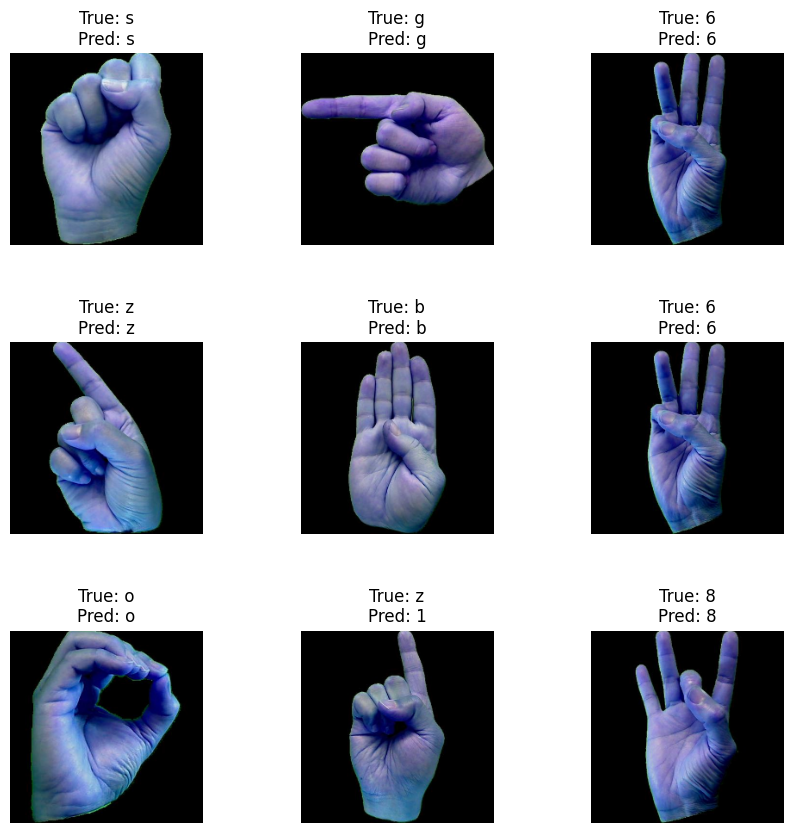

In [16]:
 #get the predicted labels for the test set
y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)

# display random predictions
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axs.flat):
    idx = random.randint(0, len(X_valid)-1) # generate a random index
    ax.imshow(X_valid[idx].astype('uint8'))
    ax.set_title(f"True: {labels[y_valid[idx]]}\nPred: {labels[y_pred_labels[idx]]}")
    ax.axis('off')
plt.show()